In [2]:
import os

import pandas as pd

import json
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
timing_dir = '../eval/analyze_outputs'
files = [os.path.abspath(os.path.join(timing_dir, f)) for f in os.listdir(timing_dir) if ('.json' in f) and any([(s in f) for s in ['class_row_row_basic', 'class_col_col_basic', 'class_row_row_nested', 'class_col_col_nested']])]
files

['/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_outputs/opt_vec_onnx_out+class_col_col_nested_iris4_1000000.json',
 '/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_outputs/opt_vec_onnx_out+class_row_row_nested_iris3_10000000.json',
 '/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_outputs/opt_vec_onnx_out+class_col_col_nested_iris3_15000000.json',
 '/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_outputs/opt_vec_onnx_out+class_row_row_basic_iris5_5000000.json',
 '/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_outputs/opt_vec_onnx_out+class_row_row_nested_iris5_10000000.json',
 '/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_outputs/opt_vec_onnx_out+class_row_row_nested_iris5_1000000.json',
 '/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_outputs/opt_vec_onnx_out+class_col_col_nested_iris5_10000000.json',
 '/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_outputs/opt_vec_onnx_out+class_row_row_nested_iris5_5000000.json',
 '/u/antor/u13/ukumaras/Projects/mldb/eval/analyze_ou

In [5]:
times_raw = {}

for file in files:
    with open(file, "r") as f:
        name = file.split("/")[-1].split(".")[0]
        workload = name.split("_")[-1]
        key = name.split("_iris")[0]
        run = name.split("_iris")[1][0]
        times_raw[key + "~" + workload + "~" + run] = json.loads(f.read())

In [6]:
times = []

for k, v in times_raw.items():
    t = {}
    t['dataset'] = 'iris'
    t['pipeline'] = k.split("~")[0][8:]
    t['workload'] = k.split("~")[1]
    t['run'] = k.split("~")[2]
    t['time'] = v['timing']
    
    times.append(t)

In [7]:
times_df = pd.DataFrame.from_records(times).loc[:, ['pipeline', 'workload', 'time']]
# times_df = times_df.melt(id_vars=['pipeline', 'workload'], value_vars=['load', 'time', 'predict', 'move_rev'], var_name='phase', value_name='time')
times_df = times_df.sort_values(['pipeline', 'workload'])
times_df['time'] = times_df['time'].astype(int)

In [8]:
times_df

,pipeline,workload,time
8,onnx_out+class_col_col_basic,1000000,1
42,onnx_out+class_col_col_basic,1000000,1
51,onnx_out+class_col_col_basic,1000000,1
10,onnx_out+class_col_col_basic,10000000,12
18,onnx_out+class_col_col_basic,10000000,13
29,onnx_out+class_col_col_basic,10000000,11
15,onnx_out+class_col_col_basic,15000000,18
36,onnx_out+class_col_col_basic,15000000,17
47,onnx_out+class_col_col_basic,15000000,17
23,onnx_out+class_col_col_basic,20000000,23


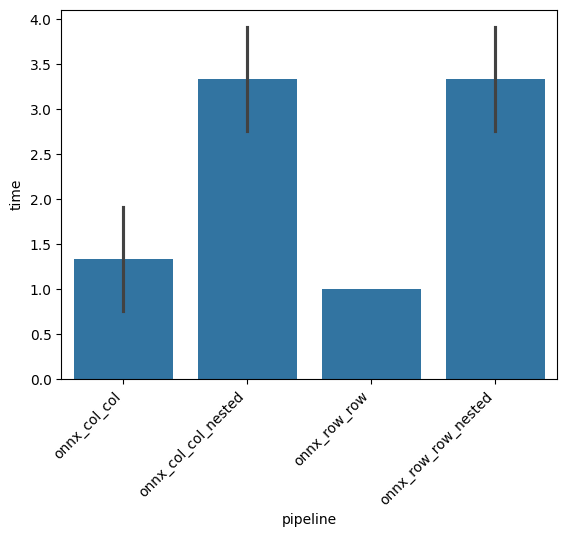

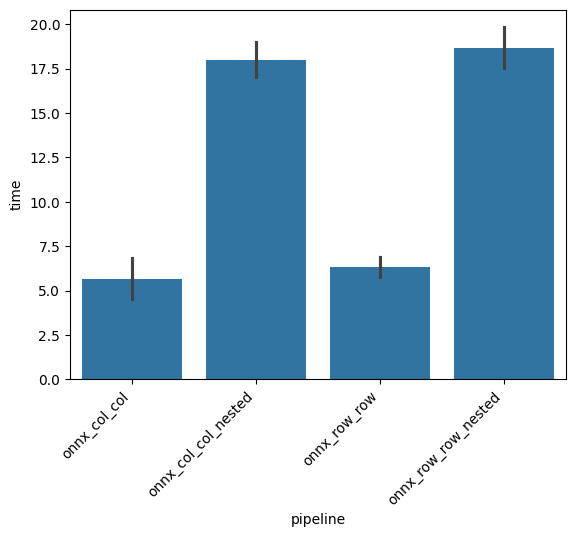

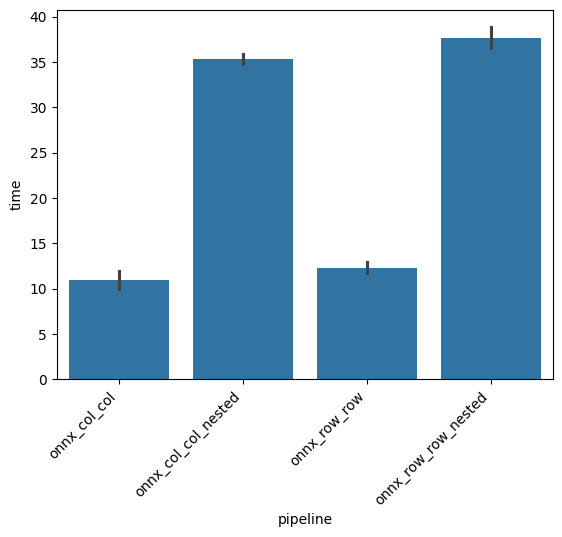

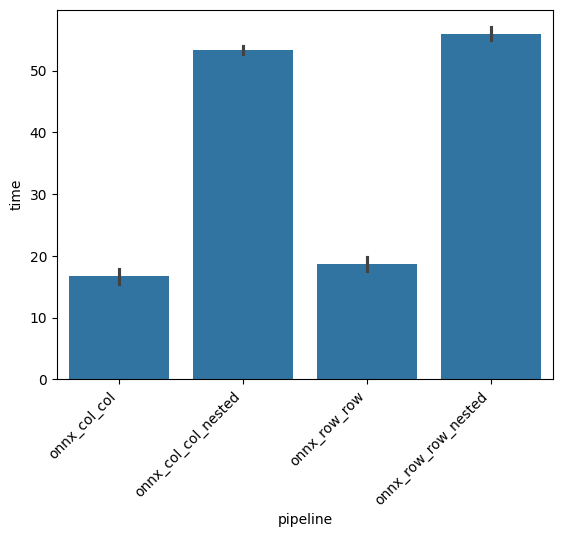

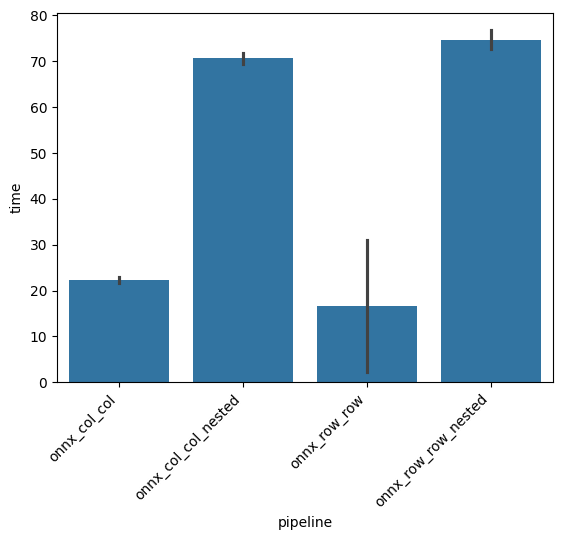

In [18]:
for w in ['1000000', '5000000', '10000000', '15000000', '20000000']:
    sns.barplot(times_df[times_df['workload'] == w], x="pipeline", y="time", errorbar='sd')
    plt.xticks(rotation=45, ha='right')
    plt.show()